# Розрахунково-графічна робота
### Студента групи ІС-34 Ткачова Костянтина

In [212]:
import numpy as np
import math
import scipy as sc
import sympy as sp
from sympy import And
from helpers import *
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from itertools import product


# Завдання 1
У коробці 5 зелених і 7 жовтих куль. Знайти ймовірність витягти жовту кулю

In [213]:
g = 5
y = 7

P_y = y / (g + y)
print(f'ймовірність витягти жовту кулю = {P_y}')

ймовірність витягти жовту кулю = 0.5833333333333334


# Завдання 2
Шість пасажирів придбали квитки на літак в одному шестимісному ряді
крісел і випадковим чином зайняли ці місця. Знайдіть ймовірності того, що
тільки 2 пасажири сіли на свої місця

In [214]:
places = 6
passengers = 6
right = 2
c_6_2 = sc.special.comb(places, right)
D_4 = derangements(places - right)
P = (c_6_2 * D_4) / sc.special.factorial(places)
print(f'ймовірність того, що тільки 2 пасажири сіли на свої місця = {P}')

ймовірність того, що тільки 2 пасажири сіли на свої місця = 0.1875


# Завдання 3
Два дійсні числа 𝑝 і 𝑞 випадково беруться з проміжку [– 2; 2]. Знайдіть
ймовірність того, що рівняння 𝑥
2 + 𝑝𝑥 + 𝑞 = 0 не має дійсних коренів.

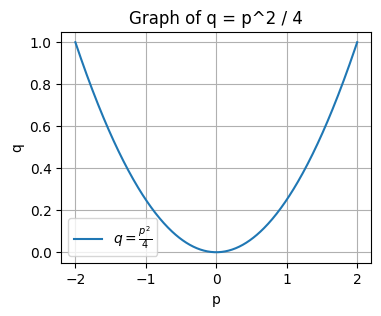

In [215]:
rng = (-2, 2)
S = 4 * 4
p, q = sp.symbols('p q')
#p**2 - 4q < 0
#q > p**2 / 4
p_vals = np.linspace(-2, 2, 400)
q_vals = p_vals ** 2 / 4

# Plot the function
plt.figure(figsize=(4, 3))
plt.plot(p_vals, q_vals, label=r'$q = \frac{p^2}{4}$')
plt.xlabel('p')
plt.ylabel('q')
plt.title('Graph of q = p^2 / 4')
plt.legend()
plt.grid(True)
plt.show()

In [216]:
S_under = sp.integrate(p ** 2 / 4, (p, rng[0], rng[1]))
P = S_under / S
print(f'ймовірність того, що рівняння 𝑥^2 + 𝑝𝑥 + 𝑞 = 0 не має дійсних коренів = {P}')

ймовірність того, що рівняння 𝑥^2 + 𝑝𝑥 + 𝑞 = 0 не має дійсних коренів = 1/12


# Завдання 4
Перший контролер оцінює якість трьох виробів, другий — двох. Події
𝐴𝑖 ={перший контролер прийняв 𝑖-й виріб, 𝑖 = 1; 2; 3}, 𝐵𝑗 ={другий контролер
прийняв 𝑗-й виріб, 𝑗 = 1; 2}, 𝐶 ={перший контролер прийняв тільки 2 вироби,
другий — тільки 1}. Виразіть подію 𝐶 через 𝐴𝑖,𝐵𝑗.


In [217]:
A1, A2, A3, B1, B2 = sp.symbols('A1 A2 A3 B1 B2')

C = ((A1 & A2 & A3 & B1 & ~B2) |
     (A1 & A2 & A3 & ~B1 & B2) |
     (A1 & A2 & ~A3 & B1 & B2) |
     (~A1 & A2 & A3 & B1 & B2) |
     (A1 & ~A2 & A3 & B1 & B2))


# Завдання 5
Партія виробів, яка містить 10 виробів першого сорту, 6 — другого сорту і 4
браковані вироби, випадковим способом розбивається на 3 частини у
співвідношенні 5:3:2. Знайдіть ймовірність того, що в першу частину потраплять
тільки вироби першого сорту, у другу — тільки другого сорту, а в третю — тільки
браковані. 

In [218]:
category_1, category_2, category_b = 10, 6, 4
total = category_1 + category_2 + category_b
p1, p2, p3 = 5, 3, 2
total_ways = sc.special.comb(total, p1) * sc.special.comb(total - p1, p2) * sc.special.comb(total - p1 - p2, p3)
favorable_ways = sc.special.comb(category_1, p1) * sc.special.comb(category_2, p2) * sc.special.comb(category_b, p3)
P = favorable_ways / total_ways
print(
    f'ймовірність того, що в першу частину потраплять тільки вироби першого сорту, у другу — тільки другого сорту, а в третю — тільки браковані = {P:.6f}')

ймовірність того, що в першу частину потраплять тільки вироби першого сорту, у другу — тільки другого сорту, а в третю — тільки браковані = 0.000065


# Завдання 6
Прилад, установлений на борту літака, працює у двох режимах: нормальному
під час крейсерського польоту і в умовах перевантаження при зльоті і посадці.
Крейсерський режим займає 70% усього часу польоту, а зліт і посадка — 30%.
Ймовірність виходу приладу з ладу під час крейсерського польоту дорівнює 0,01, 
24
а при зльоті і посадці — 0,04. 1) Знайдіть надійність (ймовірність безвідказної
роботи) приладу за весь час польоту. 2) Під час польоту прилад вийшов із ладу.
Знайдіть ймовірності того, що це сталося у крейсерському режимі. 

In [219]:
#A - прилад вийшов із ладу
#B1 - крейсерський режим
#B2 - зльот і посадка
P_B1 = 0.7
P_B2 = 0.3
P_A_B1 = 0.01
P_A_B2 = 0.04

P_A = P_B1 * P_A_B1 + P_B2 * P_A_B2
reliability = 1 - P_A

P_B1_A = (P_A_B1 * P_B1) / P_A
print(f'надійність приладу за весь час польоту = {reliability:.6f}')
print(f'ймовірність того, що це сталося у крейсерському режимі = {P_B1_A:.6f}')

надійність приладу за весь час польоту = 0.981000
ймовірність того, що це сталося у крейсерському режимі = 0.368421


# Завдання 7
Здійснюють 12 пострілів по мішені. Ймовірність влучання становить 0,5. Яка
ймовірність того, що буде 6 влучань? 

In [220]:
shoots = 12
P_hit = 0.5
hits = 6

P = sc.special.comb(shoots, hits) * P_hit ** hits * (1 - P_hit) ** (shoots - hits)
print(f'ймовірність того, що буде 6 влучань = {P:.6f}')

ймовірність того, що буде 6 влучань = 0.225586


# Завдання 8
У великій партії з 10000 товарів 3% дефектні. Яка ймовірність того, що серед
200 випадково вибраних товарів 6 будуть дефектними? 

In [221]:
amount = 10000
defective = 0.03
n = 200
k = 6

x = (k - n * defective) / math.sqrt(n * defective * (1 - defective))  #нормаване відхилення
gauss_value = sc.stats.norm.pdf(x, 0, 1)
P = gauss_value / math.sqrt(n * defective * (1 - defective))
print(f'ймовірність того, що серед 200 випадково вибраних товарів 6 будуть дефектними = {P:.6f}')

ймовірність того, що серед 200 випадково вибраних товарів 6 будуть дефектними = 0.165367


# Завдання 9
Кидаючи кубик 200 разів, знайти ймовірність того, що кількість випадань
шістки буде від 25 до 35.

In [222]:
n = 200
p = 1 / 6
k1, k2 = 25, 35

M = n * p
D = n * p * (1 - p)
CKB = math.sqrt(D)

z1 = (k1 - M) / CKB
z2 = (k2 - M) / CKB

P = sc.stats.norm.cdf(z2) - sc.stats.norm.cdf(z1)
print(f'ймовірність того, що кількість випадань шістки буде від 25 до 35 = {P:.6f}')

ймовірність того, що кількість випадань шістки буде від 25 до 35 = 0.567162


# Завдання 10
Ймовірність щодня на вулиці випадково зустріти знайому людину дорівнює
0,002. Яка ймовірність, що серед 1200 випадкових перехожих на вулиці щодня
зустрінеться 5 знайомих людей?


In [223]:
n = 1200
p = 0.002
k = 5

λ = n * p
P = λ ** k * math.exp(-λ) / math.factorial(k)
print(f'ймовірність, що серед 1200 випадкових перехожих на вулиці щодня зустрінеться 5 знайомих людей = {P:.6f}')

ймовірність, що серед 1200 випадкових перехожих на вулиці щодня зустрінеться 5 знайомих людей = 0.060196


# Завдання 11
Знайдіть 𝑥1, 𝑥4 і 𝑝3, якщо 𝑥1 < 𝑥4 і відомі математичне сподівання 𝑀(𝑋) = 1,9 і
дисперсія 𝐷(𝑋) = 2,49. Побудуйте функцію розподілу 𝐹(𝑥) випадкової
величини 𝑋 та знайдіть ймовірність потрапляння цієї величини у проміжок
(0,5; 3].

In [224]:
x1, x4, p3 = sp.symbols('x1 x4 p3')
distribution = {
    x1: 0.2,
    1: 0.4,
    3: p3,
    x4: 0.3,
}
M = 1.9
D = 2.49

P = np.array(list(distribution.values()))
p3_r = sp.solve(sp.Eq(np.sum(P), 1))[0]
print(f'p3 = {p3_r}')
M_X = np.sum([k * v for k, v in distribution.items()]) - M
M_X = M_X.subs(p3, p3_r)
M_X = sp.simplify(M_X)
print(f'M(X) = {M_X}')

M_X2 = np.sum([k ** 2 * v for k, v in distribution.items()]) - M ** 2
M_X2 = M_X2.subs(p3, p3_r)

#D_X = M_X2 - M_X**2
D_X = sp.simplify(sp.Eq(M_X2 - M_X, D))
print(f'D(X) = {D_X}')
x1_r, x4_r = sp.solve([sp.Eq(M_X, 0), D_X], (x1, x4))
print(f"Розв'язки рівняння x1 = {x1_r}, x4 = {x4_r}")

x_values = list(distribution.keys())
x1_r = [val for val in x1_r if val < x_values[1]][0]
x4_r = [val for val in x4_r if val > x_values[2]][0]
print(f"Допустимі значення x1 = {x1_r}, x4 = {x4_r}")

p3 = 0.100000000000000
M(X) = 0.2*x1 + 0.3*x4 - 1.2
D(X) = Eq(-0.2*x1**2 + 0.2*x1 - 0.3*x4**2 + 0.3*x4 + 1.11, -2.49)
Розв'язки рівняння x1 = (0.0, 4.00000000000000), x4 = (4.80000000000000, 0.800000000000000)
Допустимі значення x1 = 0.0, x4 = 4.80000000000000


Новий розподіл:
 +-----+--------+
|   x |   p(x) |
+=====+========+
| 0   |    0.2 |
+-----+--------+
| 1   |    0.4 |
+-----+--------+
| 3   |    0.1 |
+-----+--------+
| 4.8 |    0.3 |
+-----+--------+


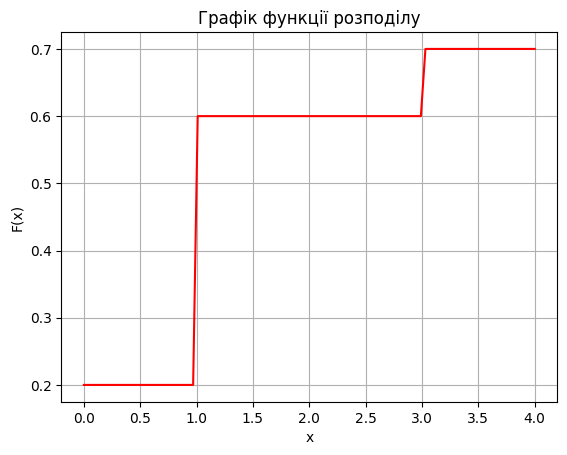

In [231]:
distribution_new = {
    x1_r: distribution[x1],
    1: distribution[1],
    3: p3_r,
    x4_r: distribution[x4],
}
x_values = list(distribution_new.keys())
print(f"Новий розподіл:\n {tabulate(distribution_new.items(), headers=['x', 'p(x)'], tablefmt='grid')}")

# Побудова функції розподілу
def F(x):
    if sp.Lt(x, x_values[0]):
        return 0
    if sp.Lt(x, x_values[1]):
        return distribution_new[x_values[0]]
    if sp.Lt(x, x_values[2]):
        return distribution_new[x_values[0]] + distribution_new[1]
    if sp.Lt(x, x_values[3]):
        return distribution_new[x_values[0]] + distribution_new[1] + distribution_new[3]
    return 0


# Побудова графіку функції розподілу
x = np.linspace(0, 4, 100)
y = [F(val) for val in x]
plt.plot(x, y, label='F(x)', color='red')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Графік функції розподілу')
plt.grid(True)
plt.show()


# Завдання 12
Неперервну випадкову величину 𝑋 задано функцією розподілу 𝐹(𝑥) (щільністю
ймовірності 𝑓(𝑥)).
1). Визначте параметр 𝐴;
2). знайдіть щільність ймовірності 𝑓(𝑥) (функцію розподілу 𝐹(𝑥));
3.) побудуйте графіки функцій 𝐹(𝑥) і 𝑓(𝑥);
4). знайдіть числові характеристики 𝑀(𝑋), 𝐷(𝑋), 𝜎(𝑋);
5). обчисліть ймовірність того, що випадкова величина 𝑋 у результаті
випробування набуде можливого значення із заданого інтервалу (𝛼; 𝛽).


In [195]:
x, A = sp.symbols('x A')
interval = (0, sp.pi / 2)

F = sp.Piecewise(
    (0, x <= 0),
    (A * (1 - sp.cos(x)), And(0 < x, x <= sp.pi / 2)),
    (1, x > sp.pi / 2)
)

#F(pi) = 1
A_v = sp.solve(sp.Eq(A * (1 - sp.cos(sp.pi)), 1))[0]
print(f'Параметр A = {A_v}')
F = F.subs(A, A_v)
print(f'Функція розподілу F(x) = {F}')

f = sp.diff(F, x)
print(f'Щільність ймовірності f(x) = {f}')


Параметр A = 1/2
Функція розподілу F(x) = Piecewise((0, x <= 0), (1/2 - cos(x)/2, x <= pi/2), (1, True))
Щільність ймовірності f(x) = Piecewise((0, x <= 0), (sin(x)/2, x <= pi/2), (0, True))


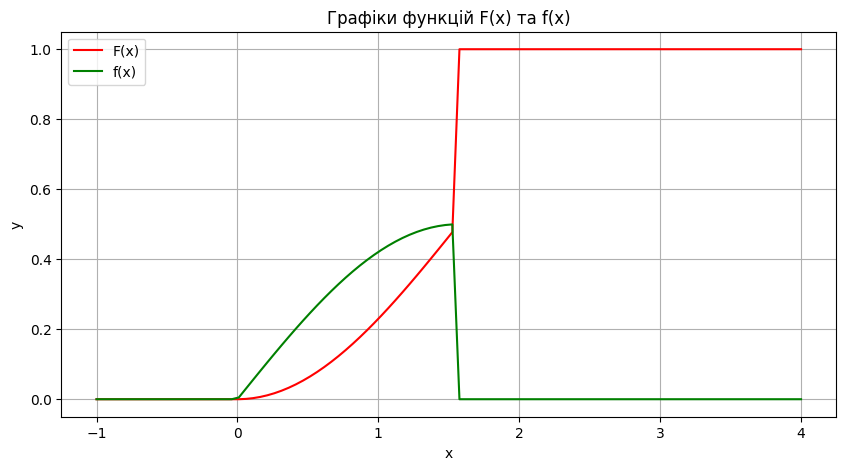

In [196]:
# Побудова графіків
F_func = sp.lambdify(x, F, 'numpy')
f_func = sp.lambdify(x, f, 'numpy')

x_vals = np.linspace(-1, 4, 100)
F_vals = F_func(x_vals)
f_vals = f_func(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, F_vals, label='F(x)', color='red')
plt.plot(x_vals, f_vals, label='f(x)', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графіки функцій F(x) та f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [197]:
# Числові характеристики

M_X = sp.integrate(x * f, (x, 0, sp.pi))
M_X = sp.simplify(M_X).evalf()
print(f'Математичне сподівання M(X) = {M_X}')

D_X = sp.integrate(x ** 2 * f, (x, 0, sp.pi)) - M_X ** 2
D_X = sp.simplify(D_X).evalf()
print(f'Дисперсія D(X) = {D_X}')

sigma_X = sp.sqrt(D_X)
print(f'Середньоквадратичне відхилення σ(X) = {sigma_X}')

Математичне сподівання M(X) = 0.500000000000000
Дисперсія D(X) = 0.320796326794897
Середньоквадратичне відхилення σ(X) = 0.566388847696436


In [198]:
#Ймовірність того, що 𝑋 у результаті випробування набуде можливого значення із (𝛼; 𝛽).
alpha, beta = sp.symbols('alpha beta')
P = sp.integrate(f, (x, alpha, beta)).evalf(subs={alpha: interval[0], beta: interval[1]})
print(f'Ймовірність того, що 𝑋 у результаті випробування набуде можливого значення із (𝛼; 𝛽) = {P}')


Ймовірність того, що 𝑋 у результаті випробування набуде можливого значення із (𝛼; 𝛽) = 0.500000000000000


# Завдання 13
Дискретна випадкова величина 𝑋 задана своїм рядом розподілу. Знайти:
1. моду випадкової величини,
2. математичне сподівання випадкової величини,
3. дисперсію випадкової величини,
4. коефіцієнт асиметрії випадкової величини,
5. ексцес випадкової величини,
6. побудувати твірну функцію випадкової величини.

In [199]:

distribution = {
    'xi': [-3, -2, -1, 0, 1],
    'pi': [0.22, 0.18, 0.21, 0.23, 0.16]
}

df = pd.DataFrame(distribution)

mode = df['xi'][df['pi'].idxmax()]
print(f'Мода випадкової величини = {mode}')

M_X = sum([xi * pi for xi, pi in zip(distribution['xi'], distribution['pi'])])
print(f'Математичне сподівання випадкової величини = {M_X}')

D_X = sum([pi * (xi - M_X) ** 2 for xi, pi in zip(distribution['xi'], distribution['pi'])])
print(f'Дисперсія випадкової величини = {D_X}')

sigma_X = math.sqrt(D_X)
skewness = sum([pi * ((xi - M_X) / sigma_X) ** 3 for xi, pi in zip(distribution['xi'], distribution['pi'])])
print(f'Коефіцієнт асиметрії випадкової величини = {skewness}')

kurtosis = sc.stats.kurtosis(distribution['xi'], fisher=True)
print(f'Ексцес випадкової величини = {kurtosis}')
M4_X = sum(p * (x - M_X) ** 4 for x, p in zip(distribution['xi'], distribution['pi']))
kurtosis = M4_X / D_X ** 2 - 3
print(f'Ексцес випадкової величини = {kurtosis}')

t = sp.symbols('t')
G = sum([pi * sp.exp(t * xi) for xi, pi in zip(distribution['xi'], distribution['pi'])])
print(f'Твірна функція випадкової величини = {G}')


Мода випадкової величини = 0
Математичне сподівання випадкової величини = -1.07
Дисперсія випадкової величини = 1.9251
Коефіцієнт асиметрії випадкової величини = -0.009504173037881054
Ексцес випадкової величини = -1.3
Ексцес випадкової величини = -1.2659868827499468
Твірна функція випадкової величини = 0.16*exp(t) + 0.23 + 0.21*exp(-t) + 0.18*exp(-2*t) + 0.22*exp(-3*t)


# Завдання 14
Неперервна випадкова величина 𝑋 задана своєю функцією розподілу.
Знайти:
1). моду випадкової величини,
2). медіану випадкової величини,
3). квантиль порядку 0.75,
4). коефіцієнт асиметрії випадкової величини,
5). ексцес випадкової величини.

In [200]:
x = sp.symbols('x', real=True)
F = sp.Piecewise(
    (0, x <= sp.exp(1) + 2),
    (sp.log(x - 2), And(x > sp.exp(1) + 2, x < sp.exp(2) + 2)),
    (1, x >= sp.exp(2) + 2)
)

#Функція щільності для проміжку де y != 0
f = sp.diff(sp.log(x - 2), x)

#Знаходиму найбільше значення функції щільності
f_lambdified = sp.lambdify(x, f, 'numpy')
minimize_result = sc.optimize.minimize_scalar(lambda x: -f_lambdified(x), bounds=(np.exp(1) + 2, np.exp(2) + 2),
                                              method='bounded')
max_value = -minimize_result.fun
mode = minimize_result.x
print(f'Мода випадкової величини = {mode}')

#Медіана
median = sp.nsolve(sp.log(x - 2) - 0.5, x, sp.N(sp.exp(1)) + 2)
print(f'Медіана випадкової величини = {median}')

#Квантиль порядку 0.75
quantile = sp.nsolve(sp.log(x - 2) - 0.75, x, sp.N(sp.exp(1)) + 2)
print(f'Квантиль порядку 0.75 = {quantile}')

#Коефіцієнт асиметрії
mean = sp.integrate(x * f, (x, sp.exp(1) + 2, sp.exp(2) + 2))
D = sp.integrate((x - mean) ** 2 * f, (x, sp.exp(1) + 2, sp.exp(2) + 2))  #Дисперсія
M3 = sp.integrate((x - mean) ** 3 * f, (x, sp.exp(1) + 2, sp.exp(2) + 2))  #Момент 3-го порядку
skewness = M3 / D ** (3 / 2)  #Коефіцієнт асиметрії
skewness = sp.simplify(skewness).evalf()
print(f'Коефіцієнт асиметрії випадкової величини = {skewness}')

M4 = sp.integrate((x - mean) ** 4 * f, (x, sp.exp(1) + 2, sp.exp(2) + 2))  #Момент 4-го порядку
kurtosis = M4 / D ** 2 - 3  #Ексцес
kurtosis = sp.simplify(kurtosis).evalf()
print(f'Ексцес випадкової величини = {kurtosis}')


Мода випадкової величини = 4.7182884010249895
Медіана випадкової величини = 3.64872127070013
Квантиль порядку 0.75 = 4.11700001661267
Коефіцієнт асиметрії випадкової величини = 0.344115313494101
Ексцес випадкової величини = -1.07025003150348


# Завдання 15
Із п’яти ключів, що є в наявності, лише один підходить до замка. Складіть
ряд розподілу випадкової величини 𝑋 — кількості випробувань при відмиканні
замка, якщо ключ, випробуваний один раз, у наступних випробуваннях участі не
бере, і знайдіть 𝑀(𝑋),𝐷(𝑋), 𝜎(𝑋) цієї випадкової величини.

In [201]:
n = 5


def P(k):
    prob = 1 / (n - k + 1)
    for i in range(k, 1, -1):
        prob *= (n - i + 1) / (n - i + 2)
    return prob


distribution = {
    'Xi': [i for i in range(1, n + 1)],
    'Pi': [P(i) for i in range(1, n + 1)]
}
df = pd.DataFrame(distribution)
print('Таблиця розподілу: \n', tabulate(df.T, headers=[], tablefmt='grid'))

Таблиця розподілу: 
 +----+-----+-----+-----+-----+-----+
| Xi | 1   | 2   | 3   | 4   | 5   |
+----+-----+-----+-----+-----+-----+
| Pi | 0.2 | 0.2 | 0.2 | 0.2 | 0.2 |
+----+-----+-----+-----+-----+-----+


In [202]:
M_X = sum([xi * pi for xi, pi in zip(distribution['Xi'], distribution['Pi'])])
D_X = sum([pi * (xi - M_X) ** 2 for xi, pi in zip(distribution['Xi'], distribution['Pi'])])
sigma_X = math.sqrt(D_X)
print(f'Математичне сподівання M(X) = {M_X}')
print(f'Дисперсія D(X) = {D_X}')
print(f'Середньоквадратичне відхилення σ(X) = {sigma_X}')

Математичне сподівання M(X) = 3.0
Дисперсія D(X) = 2.0
Середньоквадратичне відхилення σ(X) = 1.4142135623730951


# Завдання 16
Літак може бути відправлений у рейс, якщо відхилення його завантаження
від проектного не перевищує 10 т. Випадкові відхилення дійсного завантаження
від проектного підпорядковані нормальному закону з параметрами 𝑎 = 0 і 𝜎 = 4
т. Яким при цьому є відсоток безпеки польотів?

In [203]:
a = 0
sigma = 4
bounds = (-10, 10)
P_lower = sc.stats.norm.cdf(bounds[0], a, sigma)
P_upper = sc.stats.norm.cdf(bounds[1], a, sigma)

P = P_upper - P_lower
print(f"Відсоток безпеки польотів: {P * 100:.2f}%")

Відсоток безпеки польотів: 98.76%


# Завдання 17
 За даними вимірювань середнє значення відхилення осі маятника від
вертикалі становить 0,05°. 1) Оцініть ймовірність того, що відхилення осі
маятника від вертикалі (у випадковий час) не перевищить 2°; 2) оцініть ту саму
ймовірність, якщо середнє квадратичне відхилення осі маятника дорівнює 1,6°.

In [204]:
a = 0.05
sigma = sp.symbols('sigma')
x = 2

Z = (x - a) / sigma
P = sp.erf(Z / math.sqrt(2)) / x + a  # функція помилок Гауса
P = sp.simplify(P)
print(f'Ймовірність того, що відхилення осі маятника від вертикалі не перевищить 2° =\n {sp.pretty(P)}')

sigma_v = 1.6
P_v = P.subs(sigma, sigma_v)
print(f'Ймовірність того, що відхилення осі маятника від вертикалі не перевищить 2° при σ = 1.6° = {P_v}')


Ймовірність того, що відхилення осі маятника від вертикалі не перевищить 2° =
    ⎛1.37885822331377⎞       
erf⎜────────────────⎟       
   ⎝       σ        ⎠       
───────────────────── + 0.05
          2                 
Ймовірність того, що відхилення осі маятника від вертикалі не перевищить 2° при σ = 1.6° = 0.438530452916129


# Завдання 18
Систему дискретних випадкових величин (𝑋; 𝑌) задано матрицею розподілу.
Знайдіть:
1). функцію розподілу системи випадкових величин
2). ряди розподілу складових 𝑋 i 𝑌;
3). математичні сподівання та середні квадратичні відхилення складових;
4). кореляційний момент та коефіцієнт кореляції системи;
5). зробити висновок щодо сили залежності між компонентами системи.


In [205]:
data = {'Y': [0.10, 0.15, 0.20, 0.25],
        -1.00: [0.15, 0.20, 0.01, 0.25],
        0.00: [0.10, 0.15, 0.02, 0.02],
        1.00: [0.02, 0.05, 0.02, 0.01]}

df = pd.DataFrame(data) # Встановлення 'Y' як індексу
df.set_index('Y', inplace=True)

x_values = list(df.columns)
y_values = list(df.index)

# Функція розподілу
def F(x, y):
    x_vals = [val for val in x_values if val <= x]
    y_vals = [val for val in y_values if val <= y]
    return df.loc[y_vals, x_vals].values.sum()

x_probs = df[x_values].sum(axis=0)
x_probs = df.values.sum(axis=0)
y_probs = df.values.sum(axis=1)

In [206]:
M_X = sum([xi * pi for xi, pi in zip(x_values, x_probs)])
D_X = sum([pi * (xi - M_X) ** 2 for xi, pi in zip(x_values, x_probs)])
CKB_X = math.sqrt(D_X)
print(f'Математичне сподівання X = {M_X}')
print(f'Середнє квадратичне відхилення X = {CKB_X}')

M_Y = sum(y * p for y, p in zip(y_values, y_probs))
D_Y = sum(p * (y - M_Y) ** 2 for y, p in zip(y_values, y_probs))
CKB_Y = math.sqrt(D_Y)
print(f'Математичне сподівання Y = {M_Y}')
print(f'Середнє квадратичне відхилення Y = {CKB_Y}')

Математичне сподівання X = -0.51
Середнє квадратичне відхилення X = 0.6707458535093601
Математичне сподівання Y = 0.167
Середнє квадратичне відхилення Y = 0.057541289523263206


In [207]:
K = 0
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        K += (x - M_X) * (y - M_Y) * df.values[j, i]
print(f'Кореляційний момент: {K}')

r = K / (CKB_X * CKB_Y)
print(f'Коефіцієнт кореляції: {r}')

Кореляційний момент: -0.008330000000000002
Коефіцієнт кореляції: -0.2158278152036575


### Висновок:
 Коефіцієнт кореляції r=-0.4 в межах -1 до 1, 0.3 < |r| < 0.7, тому зв'язок між компонентами системи середній.

# Завдання 19
Система неперервних випадкових величин (𝑋; 𝑌) задана щільністю
розподілу. Знайдіть:
1. коефіцієнт 𝐴;
2. функцію розподілу;
3. математичні сподівання та середні квадратичні відхилення складових 𝑋 i 𝑌;
4. кореляційний момент та коефіцієнт кореляції системи.

In [208]:
x, y, A = sp.symbols('x y A')

f = sp.Piecewise(
    (A * x**2 * y, And(x <= 1, y >= 0, y <= x)),
     (0, True)
)

I = sp.integrate(sp.integrate(A*x**2*y, (y, 0, x)), (x, 0, 1))
A_v = sp.solve(I - 1, A)[0]
print(f'Коефіцієнт A = {A_v}')
f = f.subs(A, A_v)


def F(x_, y_):
    if And(x_ <= 1, y_ >= 0, y_ <= x_):
        I = sp.integrate(sp.integrate(A * x_ ** 2 * y_, (y_, 0, y_)), (x_, 0, x_))
        return I.subs({x: x_, y: y_})
    return 0

M_X = sp.integrate(sp.integrate(x * f, (y, 0, x)), (x, 0, 1))
M_Y = sp.integrate(sp.integrate(y * f, (y, 0, x)), (x, 0, 1))
print(f'Математичне сподівання X = {M_X}')
print(f'Математичне сподівання Y = {M_Y}')

M_X2 = sp.integrate(sp.integrate(x ** 2 * f, (y, 0, x)), (x, 0, 1))
M_Y2 = sp.integrate(sp.integrate(y ** 2 * f, (y, 0, x)), (x, 0, 1))
D_X = M_X2 - M_X ** 2
D_Y = M_Y2 - M_Y ** 2
CKB_X = sp.sqrt(D_X).evalf()
CKB_Y = sp.sqrt(D_Y).evalf()
print(f'Середнє квадратичне відхилення X = {CKB_X}')
print(f'Середнє квадратичне відхилення Y = {CKB_Y}')

M_XY = sp.integrate(sp.integrate(x * y * f, (y, 0, x)), (x, 0, 1))
K = M_XY - M_X * M_Y
r = K / (CKB_X * CKB_Y)
print(f'Кореляційний момент: {K}')
print(f'Коефіцієнт кореляції: {r}')

Коефіцієнт A = 10
Математичне сподівання X = 5/6
Математичне сподівання Y = 5/9
Середнє квадратичне відхилення X = 0.140859042454753
Середнє квадратичне відхилення Y = 0.220229157547803
Кореляційний момент: 5/378
Коефіцієнт кореляції: 0.426401432711221


# Завдання 20
Дана множина чисел від 1 до 10. Навмання двічі беруться по три числа. 𝑋 –
кількість чисел, які діляться на 3, у першій трійці а 𝑌 – кількість чисел, які
діляться на 4, у другій трійці. Побудувати закон розподілу системи (𝑋; 𝑌) та
встановити, залежні чи незалежні її складові.

In [209]:
data = [i for i in range(1, 11)]
for_X = [i for i in data if i % 3 == 0] # числа, які діляться на 3
X = [i for i in range(0, len(for_X) + 1)] # Можливі значення X
for_Y = [i for i in data if i % 4 == 0] # числа, які діляться на 4
Y = [i for i in range(0, len(for_Y) + 1)] # Можливі значення Y

P_X = lambda k: sc.special.comb(len(for_X), k) * sc.special.comb(len(data) - len(for_X), 3 - k) / sc.special.comb(len(data), 3)
P_Y = lambda k: sc.special.comb(len(for_Y), k) * sc.special.comb(len(data) - len(for_Y), 3 - k) / sc.special.comb(len(data), 3)

P_XY = lambda k, m: P_X(k) * P_Y(m)

table = []
for x, y in product(X, Y):
    p_x = P_X(x)
    p_y = P_Y(y)
    p_xy = P_XY(x, y)
    table.append({'X': x, 'Y': y,'P(X=x)': p_x,'P(Y=y)': p_y , 'P(X=x, Y=y)': p_xy})

df = pd.DataFrame(table)
print('Таблиця розподілу: \n', tabulate(df, headers='keys', tablefmt='pretty'))

Таблиця розподілу: 
 +----+-----+-----+----------------------+---------------------+-----------------------+
|    |  X  |  Y  |        P(X=x)        |       P(Y=y)        |      P(X=x, Y=y)      |
+----+-----+-----+----------------------+---------------------+-----------------------+
| 0  | 0.0 | 0.0 |  0.2916666666666667  | 0.4666666666666667  |  0.13611111111111113  |
| 1  | 0.0 | 1.0 |  0.2916666666666667  | 0.4666666666666667  |  0.13611111111111113  |
| 2  | 0.0 | 2.0 |  0.2916666666666667  | 0.06666666666666667 | 0.019444444444444445  |
| 3  | 1.0 | 0.0 |        0.525         | 0.4666666666666667  |  0.24500000000000002  |
| 4  | 1.0 | 1.0 |        0.525         | 0.4666666666666667  |  0.24500000000000002  |
| 5  | 1.0 | 2.0 |        0.525         | 0.06666666666666667 |         0.035         |
| 6  | 2.0 | 0.0 |        0.175         | 0.4666666666666667  |  0.08166666666666667  |
| 7  | 2.0 | 1.0 |        0.175         | 0.4666666666666667  |  0.08166666666666667  |
| 8  | 2.0 

### Висновок:
Через те, що вибір чисел у першій і другій трійках є незалежним (вони обираються окремо і без перетину), ймовірності
x та y незалежні.

# Завдання 21
Випадкова величина E має щільність розподілу 𝑝(𝑥). Знайти щільність
розподілу ймовірностей 𝑝(𝑦) випадкової величини n = ().


In [210]:
x, y = sp.symbols('x y')
p = sp.exp(-x**2/2)/sp.sqrt(2*sp.pi)
phi = x**2

# Знаходимо обернену функцію: ξ = sqrt(η) або ξ = -sqrt(η)
x_pos, x_neg = sp.sqrt(y), -sp.sqrt(y)

diff_pos = sp.diff(x_pos, y)
diff_neg = sp.diff(x_neg, y)

p_y = p.subs(x, x_pos) * abs(diff_pos) + p.subs(x, x_neg) * abs(diff_neg)
p_y = sp.simplify(p_y)

print(f'Щільність розподілу ймовірностей p(y):')
sp.pprint(p_y)

Щільність розподілу ймовірностей p(y):
     -y  
     ─── 
      2  
 √2⋅ℯ    
─────────
2⋅√π⋅│√y│
